**Check k Anonymity**


In [1]:
import pandas as pd

def check_k_anonymity(df, quasi_identifiers, k):
    group_sizes = df.groupby(quasi_identifiers).size()
    
    is_k_anonymous = ((group_sizes >= k)).all()
    
    if is_k_anonymous:
        print(f"Dataset k-anonymized with k = {k} ")
    else:
        print(f"Dataset does not respet k-anonymity with k = {k}")
        print("\nThese partitions does not respect k-anonymity:")
        print(group_sizes[(group_sizes < k)])
    
    return is_k_anonymous

anonymized_df = pd.read_csv('data/anonymized.csv')
original_df = pd.read_csv('data/database.csv')   

quasi_identifiers = ['age', 'gender', 'city', 'education', 'profession']
k = 3  

check_k_anonymity(anonymized_df, quasi_identifiers, k)


FileNotFoundError: [Errno 2] No such file or directory: 'data/anonymized.csv'

**General-Purpose Quality Metrics** (Paragraph 1.2)

The simplest kind of quality measure is based on the size of the equivalence classes E in V. We will see the discernability metric (C_DM) and the normalized average equivalence class size metric (C_AVG).

Discernability metric (C_DM)

In [ ]:
def discernability_penalty(df, qi):
    partitions = df.groupby(qi).size()
    dp = sum(size**2 for size in partitions)
    
    return dp

In [ ]:
discernability_penalty = discernability_penalty(anonymized_df, quasi_identifiers)
discernability_penalty

3184

Normalized Average Equivalence Class Size Metric (C_AVG)

In [ ]:
def equivalence_size_metric (df, qi, k):
    df_len = len(df)
    partitions = df.groupby(qi).size()
    partitions_len = len(partitions)
    C_avg = (df_len/partitions_len)/k
    
    return C_avg

In [ ]:
equivalence_size_metric = equivalence_size_metric(anonymized_df, quasi_identifiers, k=3)
equivalence_size_metric

1.0319917440660475

**Bounds on Quality** (Paragraph 4.1)

By definition, k-anonymity requires that every equivalence class contain
at least k records. For this reason, the optimal achievable
value of C_DM >= k*total_records and C_AVG >= 1

In [ ]:
def optimal_achievable_value (df, cdm, cavg, k):
    df_len = len(df)
    if cdm >= k*df_len:
        print("C_DM is the optimal achievable value (denoted C_DM*)")
    else:
        print("C_DM is not the optimal achievable value")
    if cavg >= 1:
        print("C_AVG is the optimal achievable value (denoted C_AVG*)")
    else:
        print("C_AVG is not the optimal achievable value")

In [ ]:
optimal_achievable_value(anonymized_df, discernability_penalty, equivalence_size_metric, k=3)

C_DM is the optimal achievable value (denoted C_DM*)
C_AVG is the optimal achievable value (denoted C_AVG*)


**General-Purpose Metrics** (Paragraph 6.2)

The first graph compares the model for varied k. 

In the second one, we compared the model with different number of attributes.

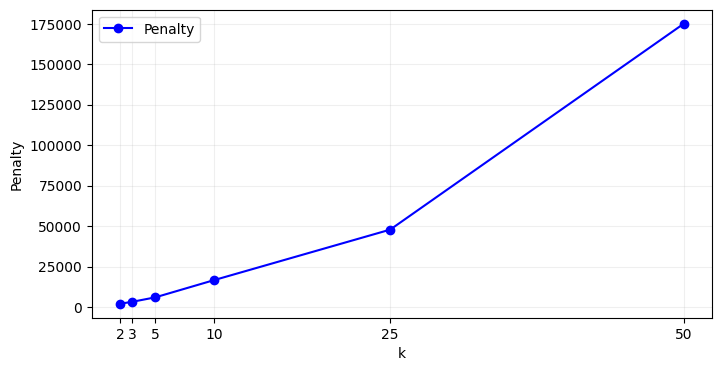

In [ ]:
import matplotlib.pyplot as plt

def plot_penalty_vs_k(k_values, penalty_values):
    plt.figure(figsize=(8, 4))
    
    plt.plot(k_values, penalty_values, marker='o', linestyle='-', color='b', label='Penalty')
    
    plt.xlabel('k')
    plt.ylabel('Penalty')
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True, alpha=0.2)  
    plt.show()


k_values = [2, 3, 5, 10, 25, 50]
penalty_values = [2016, 3148, 5958, 16592, 47788, 175000]
plot_penalty_vs_k(k_values, penalty_values)


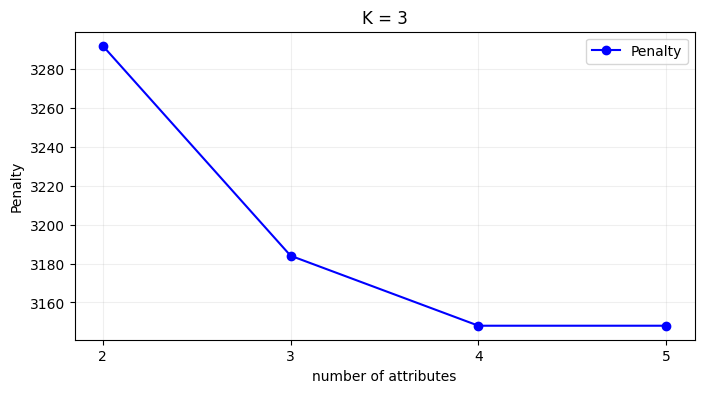

In [ ]:
def plot_penalty_vs_attributes(number_of_attributes, penalty_values):
    plt.figure(figsize=(8, 4))

    plt.plot(number_of_attributes, penalty_values, marker='o', linestyle='-', color='b', label='Penalty')

    plt.xlabel('number of attributes')
    plt.ylabel('Penalty')

    plt.xticks(number_of_attributes)
    plt.title('K = 3')
    plt.legend()
    plt.grid(True, alpha=0.2)  
    plt.show()

number_of_attributes = [2, 3, 4, 5]
penalty_values = [3292, 3184, 3148, 3148]
plot_penalty_vs_attributes(number_of_attributes, penalty_values)
